<a href="https://colab.research.google.com/github/sherna90/mineria_datos/blob/master/2-feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering

# Tarea

En este laboratorio Ud debe completar las siguientes tareas:


1.   Implementar un modelo base para predecir la variable 'nuevos casos por millon de habitantes' usando las tasas de movilidad.
2.   Reportar la metrica de ajuste del modelo base.
3. Reportar la metrica de ajuste del modelo usando feature engineering.


In [1]:
# Analisis Exploratorio de Casos COVID 
import pandas as pd

data=pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto1/Covid-19.csv')


In [2]:
data['Region'] = data['Region'].astype('category')
data['Comuna'] = data['Comuna'].astype('category')
data['Codigo comuna'] = data['Codigo comuna'].astype('category')
data['Codigo region'] = data['Codigo region'].astype('category')

In [3]:
data_maule=data[data.Region=='Maule']

In [4]:
data_maule[data_maule.Comuna=='Talca'].head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2022-03-07,2022-03-11,2022-03-14,2022-03-18,2022-03-21,2022-03-25,2022-03-28,2022-04-01,2022-04-04,Tasa
200,Maule,7,Talca,7101.0,236724.0,34.0,37.0,42.0,48.0,51.0,...,48488.0,49957.0,50982.0,52301.0,52887.0,53542.0,53897.0,54334.0,54591.0,23061.0


In [5]:
data_maule.drop(columns=['Region','Codigo region','Codigo comuna'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [6]:
data_maule_tabla=data_maule.melt(id_vars=['Comuna', 'Poblacion','Tasa'], 
        var_name='Fecha', 
        value_name='Casos')

In [7]:
data_maule_tabla['Fecha'] = pd.to_datetime(data_maule_tabla['Fecha'],format='%Y/%m/%d')

In [11]:
data_maule_tabla[data_maule_tabla.Comuna=='Talca'].sort_values('Fecha').tail(10)

,Comuna,Poblacion,Tasa,Fecha,Casos
6318,Talca,236724.0,23061.0,2022-03-04,47105.0
6349,Talca,236724.0,23061.0,2022-03-07,48488.0
6380,Talca,236724.0,23061.0,2022-03-11,49957.0
6411,Talca,236724.0,23061.0,2022-03-14,50982.0
6442,Talca,236724.0,23061.0,2022-03-18,52301.0
6473,Talca,236724.0,23061.0,2022-03-21,52887.0
6504,Talca,236724.0,23061.0,2022-03-25,53542.0
6535,Talca,236724.0,23061.0,2022-03-28,53897.0
6566,Talca,236724.0,23061.0,2022-04-01,54334.0
6597,Talca,236724.0,23061.0,2022-04-04,54591.0


Text(0.5, 1.0, 'Casos confirmados Maule')

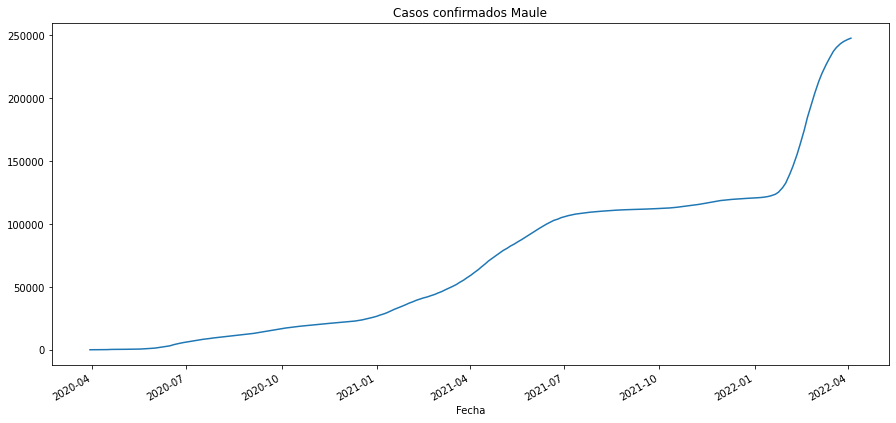

In [36]:
import matplotlib.pyplot as plt

grouped_data_maule=data_maule_tabla.groupby('Fecha').sum()
grouped_data_maule['Casos'].plot(figsize=(15,7))
plt.title('Casos confirmados Maule')

In [47]:
poblacion_maule=0.
for i,comuna in enumerate(data_maule_tabla['Comuna'].unique()):
  pop=data_maule_tabla.loc[data_maule_tabla['Comuna']==comuna]['Poblacion'].values[0]
  print('{} Comuna {}, Poblacion {}'.format(i,comuna,pop))
  if not pd.isna(pop):
    poblacion_maule+=pop
print('Poblacion Maule : {}'.format(poblacion_maule))

0 Comuna Cauquenes, Poblacion 44143.0
1 Comuna Chanco, Poblacion 9331.0
2 Comuna Colbun, Poblacion 22565.0
3 Comuna Constitucion, Poblacion 50348.0
4 Comuna Curepto, Poblacion 9426.0
5 Comuna Curico, Poblacion 163626.0
6 Comuna Empedrado, Poblacion 4206.0
7 Comuna Hualane, Poblacion 10222.0
8 Comuna Licanten, Poblacion 6989.0
9 Comuna Linares, Poblacion 101073.0
10 Comuna Longavi, Poblacion 32810.0
11 Comuna Maule, Poblacion 60000.0
12 Comuna Molina, Poblacion 49800.0
13 Comuna Parral, Poblacion 44544.0
14 Comuna Pelarco, Poblacion 9083.0
15 Comuna Pelluhue, Poblacion 8092.0
16 Comuna Pencahue, Poblacion 8601.0
17 Comuna Rauco, Poblacion 11248.0
18 Comuna Retiro, Poblacion 21071.0
19 Comuna Rio Claro, Poblacion 14753.0
20 Comuna Romeral, Poblacion 16170.0
21 Comuna Sagrada Familia, Poblacion 19469.0
22 Comuna San Clemente, Poblacion 46292.0
23 Comuna San Javier, Poblacion 49451.0
24 Comuna San Rafael, Poblacion 9959.0
25 Comuna Talca, Poblacion 236724.0
26 Comuna Teno, Poblacion 30850.

In [37]:
grouped_data_maule

,Poblacion,Tasa,Casos
Fecha,,,
2020-03-30,1131939.0,634660.1,48.0
2020-04-01,1131939.0,634660.1,55.0
2020-04-03,1131939.0,634660.1,67.0
2020-04-06,1131939.0,634660.1,88.0
2020-04-08,1131939.0,634660.1,101.0
...,...,...,...
2022-03-21,1131939.0,634660.1,240335.0
2022-03-25,1131939.0,634660.1,243405.0
2022-03-28,1131939.0,634660.1,245074.0


In [48]:
prevalencia_maule=grouped_data_maule.diff()/poblacion_maule

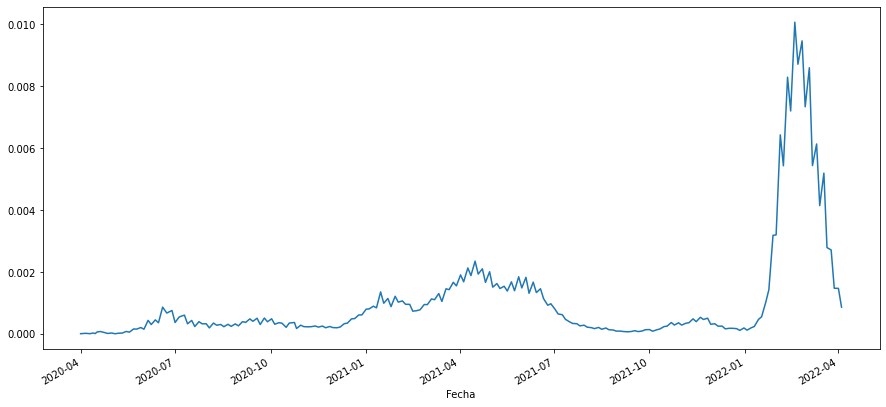

In [51]:
prevalencia_maule['Casos'].plot(figsize=(15,7))

In [52]:
def get_mobility_data():
    data=pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=5a11e4fc1b8138c6')
    return data

mobility_report=get_mobility_data()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DtypeWarning: Columns (3,4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  """


In [53]:
mobility_report.dtypes

country_region_code                                    object
country_region                                         object
sub_region_1                                           object
sub_region_2                                           object
metro_area                                             object
iso_3166_2_code                                        object
census_fips_code                                      float64
place_id                                               object
date                                                   object
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
dtype: object

In [54]:
mobility_report['date']=pd.to_datetime(mobility_report['date'],format='%Y/%m/%d')
mobility_report['country_region_code'] = mobility_report['country_region_code'].astype('category')
mobility_report['country_region'] = mobility_report['country_region'].astype('category')
mobility_report['iso_3166_2_code'] = mobility_report['iso_3166_2_code'].astype('category')
mobility_report['sub_region_1'] = mobility_report['sub_region_1'].astype('category')
mobility_report['sub_region_2'] = mobility_report['sub_region_2'].astype('category')
mobility_report.drop(['census_fips_code','iso_3166_2_code','place_id','metro_area'],axis=1,inplace=True)

In [55]:
mobility_chile=mobility_report.loc[mobility_report.country_region=='Chile'].copy()
mobility_chile.set_index('date',inplace=True)
mobility_chile.sort_index(inplace=True)

In [56]:
mobility_maule=mobility_chile[mobility_chile.sub_region_1=='Maule']

In [57]:
mobility_maule=mobility_maule.groupby('date').mean()

In [58]:
df_maule=pd.merge(prevalencia_maule,mobility_maule, left_index=True, right_index=True)

In [59]:
df_maule.dtypes

Poblacion                                             float64
Tasa                                                  float64
Casos                                                 float64
retail_and_recreation_percent_change_from_baseline    float64
grocery_and_pharmacy_percent_change_from_baseline     float64
parks_percent_change_from_baseline                    float64
transit_stations_percent_change_from_baseline         float64
workplaces_percent_change_from_baseline               float64
residential_percent_change_from_baseline              float64
dtype: object

In [60]:
df_maule['Casos']

2020-03-30         NaN
2020-04-01    0.000006
2020-04-03    0.000011
2020-04-06    0.000019
2020-04-08    0.000011
                ...   
2022-03-21    0.002789
2022-03-25    0.002712
2022-03-28    0.001474
2022-04-01    0.001471
2022-04-04    0.000865
Name: Casos, Length: 213, dtype: float64

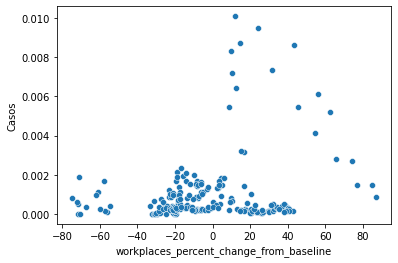

In [61]:
import seaborn as sns

sns.scatterplot(x="workplaces_percent_change_from_baseline", y="Casos", data=df_maule)


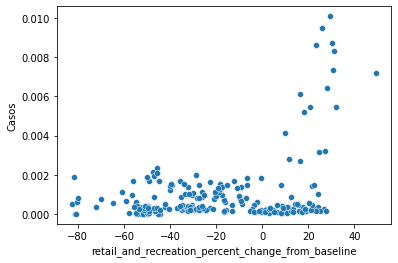

In [62]:
sns.scatterplot(x="retail_and_recreation_percent_change_from_baseline", y="Casos", data=df_maule)


In [67]:
df_maule.drop(columns=['Tasa','Poblacion'],inplace=True)

In [68]:
df_maule['Casos'].isna().sum()

1

In [69]:
df_maule.dropna(inplace=True)

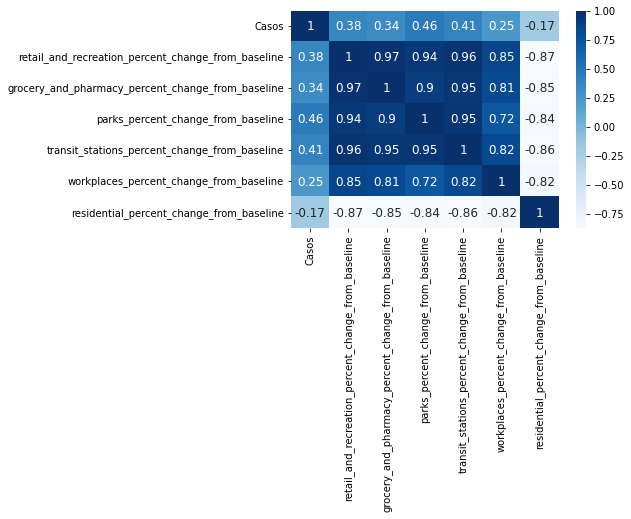

In [107]:
dfcorr = df_maule.corr(method="pearson")
sns.heatmap(dfcorr, annot=True,annot_kws={"size":12}, cmap="Blues")
plt.show()

In [137]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score

y=df_maule['Casos'].values
X=df_maule[df_maule.columns.difference(['Casos'])].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = ElasticNet(normalize=False,fit_intercept=True).fit(X_train, y_train)
y_hat=model.predict(X_test)
print('Coeficiente de Determinacion R2 Modelo Base: {0:0.2f}'.format(model.score(X_test,y_test)))
print('MAE Modelo Base: {0:0.2f}'.format(mean_absolute_error(y_test,y_hat)))
print('% Varianza Explicada  Modelo Base: {0:0.2f}'.format(explained_variance_score(y_test,y_hat)))

Coeficiente de Determinacion R2 Modelo Base: -0.00
MAE Modelo Base: 0.00
% Varianza Explicada  Modelo Base: -0.00


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


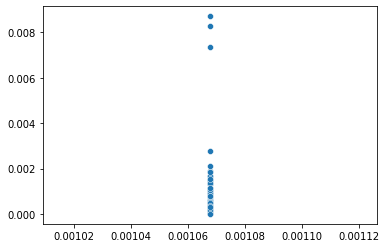

In [138]:
sns.scatterplot(y_hat,y_test)

In [135]:
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler,Normalizer
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps=[
    ('scaler',None),
    ('preprocessor', PolynomialFeatures(degree=3, include_bias=False,interaction_only=False)),
    ('estimator', ElasticNet(fit_intercept=False))
])

# fit the pipeline
pipe.fit(X_train, y_train)
y_hat = pipe.predict(X_test)
print('Coeficiente de Determinacion R2 Modelo Base: {0:0.2f}'.format(pipe.score(X_test,y_test)))
print('MAE Modelo Base: {0:0.2f}'.format(mean_absolute_error(y_test,y_hat)))
print('% Varianza Explicada  Modelo Base: {0:0.2f}'.format(explained_variance_score(y_test,y_hat)))

Coeficiente de Determinacion R2 Modelo Base: 0.44
MAE Modelo Base: 0.00
% Varianza Explicada  Modelo Base: 0.44


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.914e-06, tolerance: 6.087e-08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


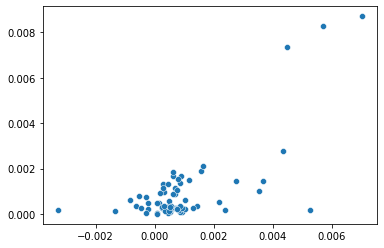

In [136]:
sns.scatterplot(y_hat,y_test)

In [108]:
poly=PolynomialFeatures(degree=3, include_bias=False,interaction_only=True)
X_train_poly=poly.fit_transform(X_train)
print(X_train.shape)
print(X_train_poly.shape)

(142, 6)
(142, 41)


In [112]:
from scipy.special import comb

comb(6,2)+comb(6,3)+6

41.0

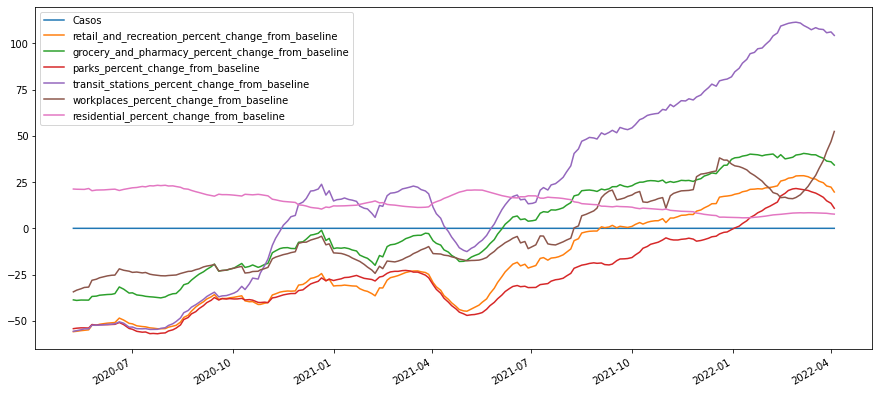

In [140]:
df_maule.rolling(14).mean().plot(figsize=(15,7))

In [162]:
y=df_maule['Casos'].rolling(14).mean().dropna().values
X=df_maule[df_maule.columns.difference(['Casos'])].rolling(14).mean().dropna().values


In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = ElasticNet(False,fit_intercept=True).fit(X_train, y_train)
y_hat=model.predict(X_test)
print('Coeficiente de Determinacion R2 Media Movil: {0:0.2f}'.format(model.score(X_test,y_test)))
print('MAE Modelo Base: {0:0.2f}'.format(mean_absolute_error(y_test,y_hat)))

Coeficiente de Determinacion R2 Media Movil: 0.79
MAE Modelo Base: 0.00


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.018e-05, tolerance: 2.730e-08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, po

In [164]:
from sklearn.preprocessing import PowerTransformer

pipe = Pipeline(steps=[
    ('scaler',None),
    ('preprocessor', PolynomialFeatures(degree=3, include_bias=False,interaction_only=False)),
    ('estimator', ElasticNet(fit_intercept=False))
])

# fit the pipeline
pipe.fit(X_train, y_train)
y_hat = pipe.predict(X_test)
print('Coeficiente de Determinacion R2 Modelo Base: {0:0.2f}'.format(pipe.score(X_test,y_test)))
print('MAE Modelo Base: {0:0.2f}'.format(mean_absolute_error(y_test,y_hat)))

Coeficiente de Determinacion R2 Modelo Base: 0.94
MAE Modelo Base: 0.00


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.300e-07, tolerance: 4.045e-08
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


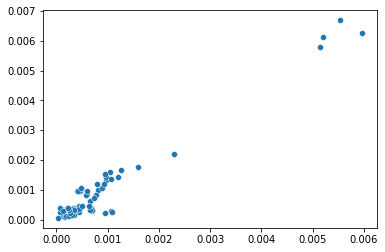

In [165]:
sns.scatterplot(y_hat,y_test)

In [166]:
pipe.get_params()

{'estimator': ElasticNet(fit_intercept=False),
 'estimator__alpha': 1.0,
 'estimator__copy_X': True,
 'estimator__fit_intercept': False,
 'estimator__l1_ratio': 0.5,
 'estimator__max_iter': 1000,
 'estimator__normalize': 'deprecated',
 'estimator__positive': False,
 'estimator__precompute': False,
 'estimator__random_state': None,
 'estimator__selection': 'cyclic',
 'estimator__tol': 0.0001,
 'estimator__warm_start': False,
 'memory': None,
 'preprocessor': PolynomialFeatures(degree=3, include_bias=False),
 'preprocessor__degree': 3,
 'preprocessor__include_bias': False,
 'preprocessor__interaction_only': False,
 'preprocessor__order': 'C',
 'scaler': None,
 'steps': [('scaler', None),
  ('preprocessor', PolynomialFeatures(degree=3, include_bias=False)),
  ('estimator', ElasticNet(fit_intercept=False))],
 'verbose': False}